In [1]:
import numpy as np
from Utilities import PlotImages
import matplotlib.pyplot as plt

In [2]:
data = np.load("/work/MA490_DeepLearning/Share/Dice/CleanedDiceData64.npz", allow_pickle=True)

In [3]:
data.files

['images', 'labels']

In [4]:
images = data["images"]
labels = data["labels"]

In [5]:
print(images.shape)
print(images[0].shape)
print(labels.shape)

(2768, 64, 64, 3)
(64, 64, 3)
(2768,)


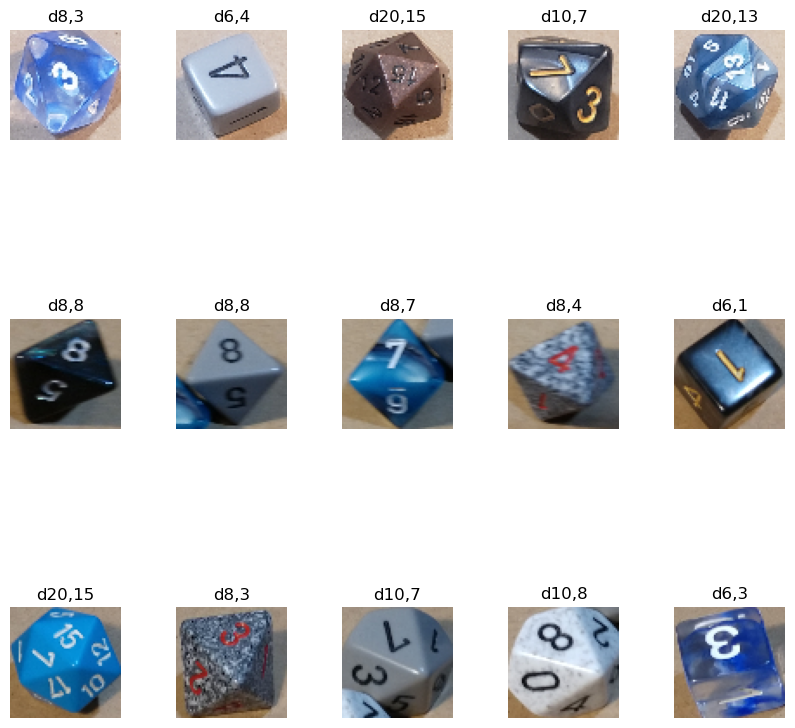

In [6]:
PlotImages(2000, 15, 3, 5, images, labels)
plt.show()

In [7]:
typeOfDice = 6

In [8]:
d6images = []
d6labels = []
for i in range(len(images)):
    split = labels[i].split(",")
    if len(split) != 2:
        continue
    (diceType, diceValue) = split
    if diceType == "d"+str(typeOfDice) and diceValue.isnumeric() and int(diceValue) < typeOfDice+1:
        d6images.append(images[i])
        d6labels.append(diceValue)
        
d6images = np.array(d6images)
d6labels = np.array(d6labels)

In [9]:
numTest = 40
d6imagesTest = d6images[:numTest]
d6labelsTest = d6labels[:numTest]
d6images = d6images[numTest:]
d6labels = d6labels[numTest:]

In [10]:
print(d6images.shape)
print(d6labels.shape)

(500, 64, 64, 3)
(500,)


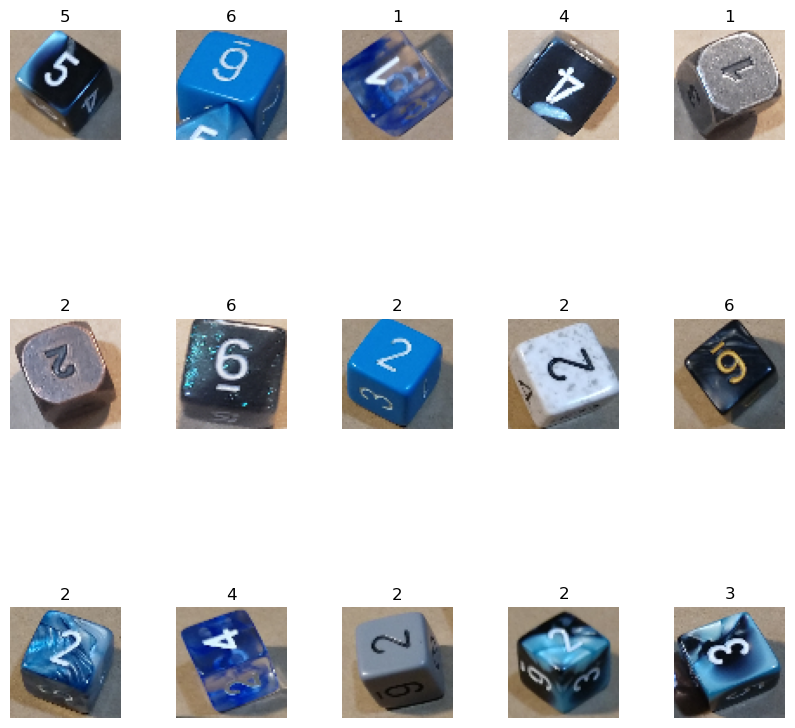

In [11]:
PlotImages(0, 15, 3, 5, d6images, d6labels)
plt.show()

## Feature Extraction

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16

In [13]:
vgg16 = VGG16(weights="imagenet", include_top=False)
features = vgg16.predict(d6images)
featuresTest = vgg16.predict(d6imagesTest)
# features = d6images

In [14]:
print(features.shape)
print(featuresTest.shape)

(500, 2, 2, 512)
(40, 2, 2, 512)


In [15]:
m = features.shape[0]
mTest = featuresTest.shape[0]
n = features.shape[1]*features.shape[2]*features.shape[3]
X = features.reshape(m, n)
XTest = featuresTest.reshape(mTest, n)
y = np.array(list(map(lambda x: int(x)-1, d6labels)))
yTest = np.array(list(map(lambda x: int(x)-1, d6labelsTest)))
X.shape

(500, 2048)

In [16]:
X = X/X.max()
XTest = XTest/XTest.max()
print("min:", X.min(), ", max:", X.max())

min: 0.0 , max: 1.0


## Hyper-Parameter Tuning

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [18]:
def BuildFullyConnected(ninputs, nhidden, noutputs, p):
    model = Sequential()
    model.add(Dropout(p, input_shape=(ninputs,)))
    num_nodes = ninputs//2
    for k in range(nhidden):
        model.add(Dense(num_nodes, activation="relu"))
        model.add(Dropout(p))
        num_nodes //= 2
    model.add(Dense(noutputs, activation="softmax"))
    return model

Train on 400 samples, validate on 100 samples
Epoch 1/40
400/400 - 1s - loss: 1.6927 - val_loss: 1.0987
Epoch 2/40
400/400 - 0s - loss: 0.8086 - val_loss: 1.1423
Epoch 3/40
400/400 - 0s - loss: 0.4454 - val_loss: 0.9560
Epoch 4/40
400/400 - 0s - loss: 0.2027 - val_loss: 0.9402
Epoch 5/40
400/400 - 0s - loss: 0.1161 - val_loss: 1.0263
Epoch 6/40
400/400 - 0s - loss: 0.0499 - val_loss: 1.0841
Epoch 7/40
400/400 - 0s - loss: 0.0192 - val_loss: 1.0488
Epoch 8/40
400/400 - 0s - loss: 0.0113 - val_loss: 1.0946
Epoch 9/40
400/400 - 0s - loss: 0.0068 - val_loss: 1.0875
Epoch 10/40
400/400 - 0s - loss: 0.0048 - val_loss: 1.1295
Epoch 11/40
400/400 - 0s - loss: 0.0038 - val_loss: 1.1338
Epoch 12/40
400/400 - 0s - loss: 0.0031 - val_loss: 1.1451
Epoch 13/40
400/400 - 0s - loss: 0.0026 - val_loss: 1.1575
Epoch 14/40
400/400 - 0s - loss: 0.0023 - val_loss: 1.1685
Epoch 15/40
400/400 - 0s - loss: 0.0020 - val_loss: 1.1742
Epoch 16/40
400/400 - 0s - loss: 0.0018 - val_loss: 1.1801
Epoch 17/40
400/400

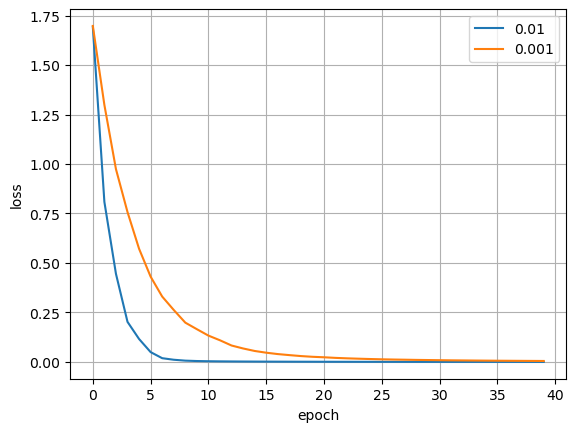

In [19]:
n0 = X.shape[1]
lr_list = [0.01, 0.001]
for lr in lr_list:
    model = BuildFullyConnected(n0, 1, typeOfDice, 0)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=lr))
    hist = model.fit(X, y, epochs=40, validation_split=0.2, verbose=2)
    plt.plot(hist.epoch, hist.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(lr_list)
plt.grid()
plt.show()

Train on 400 samples, validate on 100 samples
Epoch 1/40
400/400 - 1s - loss: 1.7408 - val_loss: 1.2719
Epoch 2/40
400/400 - 0s - loss: 0.9372 - val_loss: 0.9781
Epoch 3/40
400/400 - 0s - loss: 0.4681 - val_loss: 1.1161
Epoch 4/40
400/400 - 0s - loss: 0.2019 - val_loss: 0.9993
Epoch 5/40
400/400 - 0s - loss: 0.1253 - val_loss: 1.0122
Epoch 6/40
400/400 - 0s - loss: 0.0555 - val_loss: 1.0995
Epoch 7/40
400/400 - 0s - loss: 0.0253 - val_loss: 1.1513
Epoch 8/40
400/400 - 0s - loss: 0.0107 - val_loss: 1.0947
Epoch 9/40
400/400 - 0s - loss: 0.0058 - val_loss: 1.1151
Epoch 10/40
400/400 - 0s - loss: 0.0038 - val_loss: 1.1268
Epoch 11/40
400/400 - 0s - loss: 0.0029 - val_loss: 1.1446
Epoch 12/40
400/400 - 0s - loss: 0.0025 - val_loss: 1.1446
Epoch 13/40
400/400 - 0s - loss: 0.0021 - val_loss: 1.1715
Epoch 14/40
400/400 - 0s - loss: 0.0018 - val_loss: 1.1676
Epoch 15/40
400/400 - 0s - loss: 0.0016 - val_loss: 1.1834
Epoch 16/40
400/400 - 0s - loss: 0.0014 - val_loss: 1.1906
Epoch 17/40
400/400

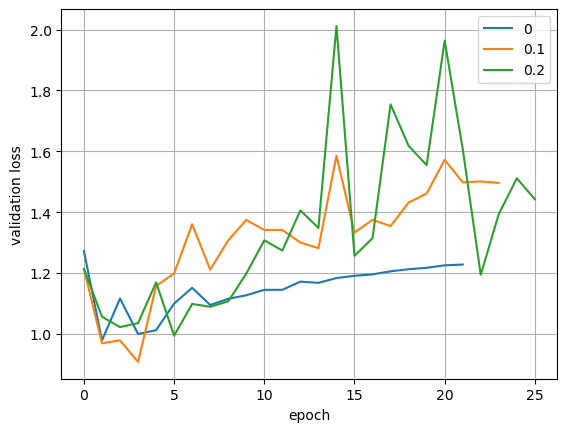

In [20]:
n0 = X.shape[1]
p_list = [0, 0.1, 0.2]
stopping = EarlyStopping(patience=20)
for p in p_list:
    model = BuildFullyConnected(n0, 1, typeOfDice, p)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.01))
    hist = model.fit(X, y, epochs=40, validation_split=0.2, verbose=2, callbacks=[stopping])
    plt.plot(hist.epoch, hist.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("validation loss")
plt.legend(p_list)
plt.grid()
plt.show()

Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 - 1s - loss: 1.5238 - accuracy: 0.3800 - val_loss: 1.2432 - val_accuracy: 0.5300
Epoch 2/100
400/400 - 0s - loss: 0.7412 - accuracy: 0.7200 - val_loss: 0.9757 - val_accuracy: 0.5900
Epoch 3/100
400/400 - 0s - loss: 0.3376 - accuracy: 0.8850 - val_loss: 0.9048 - val_accuracy: 0.6800
Epoch 4/100
400/400 - 0s - loss: 0.1623 - accuracy: 0.9550 - val_loss: 0.9789 - val_accuracy: 0.6700
Epoch 5/100
400/400 - 0s - loss: 0.0649 - accuracy: 0.9900 - val_loss: 0.9622 - val_accuracy: 0.7100
Epoch 6/100
400/400 - 0s - loss: 0.0243 - accuracy: 1.0000 - val_loss: 1.1245 - val_accuracy: 0.6800
Epoch 7/100
400/400 - 0s - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.1294 - val_accuracy: 0.6500
Epoch 8/100
400/400 - 0s - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.0902 - val_accuracy: 0.7100
Epoch 9/100
400/400 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.1060 - val_accuracy: 0.6800
Epoch 10/100
400/400 - 0s - loss: 0.0029 - ac

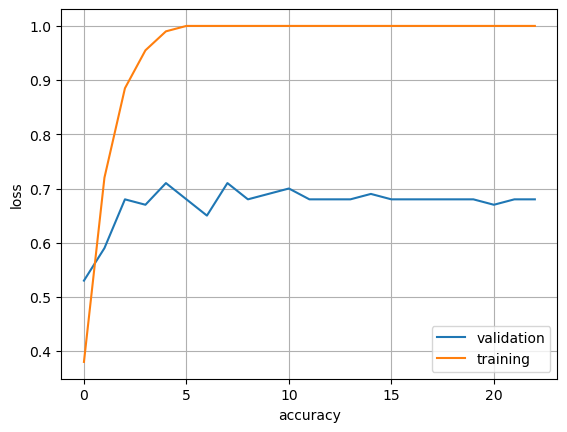

In [21]:
n0 = X.shape[1]
model = BuildFullyConnected(n0, 1, typeOfDice+1, 0)
stopping = EarlyStopping(patience=20)
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
hist = model.fit(X, y, epochs=100, validation_split=0.2, verbose=2, callbacks=[stopping])
plt.plot(hist.epoch, hist.history["val_accuracy"])
plt.plot(hist.epoch, hist.history["accuracy"])
plt.legend(["validation", "training"])
plt.xlabel("accuracy")
plt.ylabel("loss")
plt.grid()
plt.show()

In [22]:
predictions = model.predict_classes(XTest)
(predictions == yTest).sum() / len(predictions)

0.6

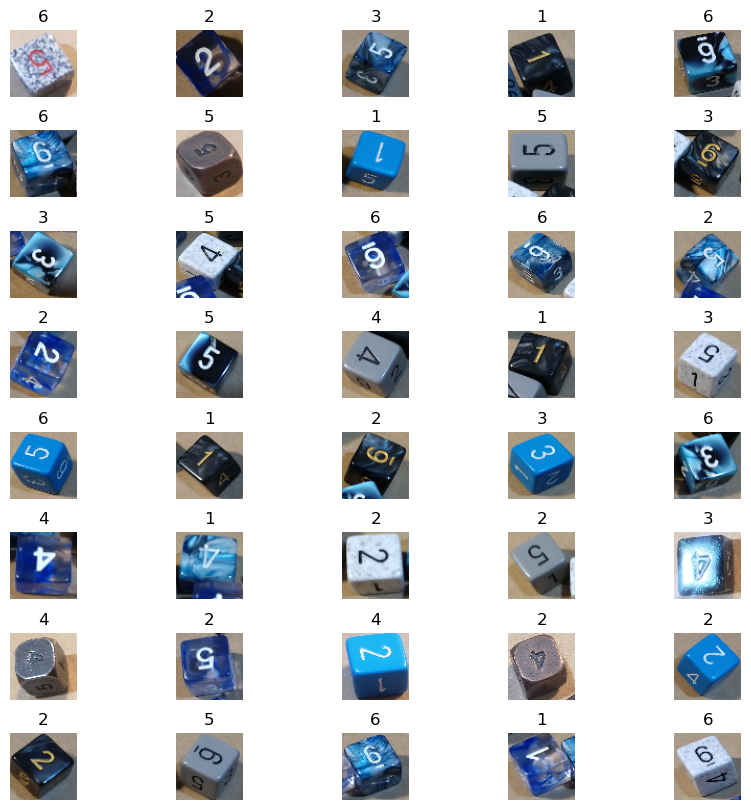

In [23]:
PlotImages(0, numTest, int(numTest/5), 5, d6imagesTest, list(map(lambda x: x + 1, predictions)))
plt.show()